In [1]:
import pandas as pd

df = pd.read_csv('datasets/soil/soil_data.csv')

df.head()

,Records,410,435,460,485,510,535,560,585,610,...,900,940,Capacitity Moist,Temp,Moist,EC (u/10 gram),Ph,Nitro (mg/10 g),Posh Nitro (mg/10 g),Pota Nitro (mg/10 g)
0,100_0ml-1,720.93,146.4,366.36,102.16,174.56,175.43,29.18,35.59,150.25,...,13.83,7.08,2639,36.1,0.0,0.0,7.88,0.0,0.0,0.0
1,100_0ml-1,716.31,146.4,365.45,94.56,173.06,160.69,24.62,29.86,141.01,...,13.83,7.08,2650,38.2,0.0,0.0,7.60,0.0,0.0,0.0
2,100_0ml-10,719.39,146.4,366.36,96.25,174.56,162.10,27.36,33.13,138.70,...,14.40,7.08,2638,36.1,0.0,0.0,8.02,0.0,0.0,0.0
3,100_0ml-10,715.54,146.4,366.36,95.40,173.81,163.50,25.08,30.27,144.47,...,14.40,7.08,2636,38.2,0.0,0.0,7.52,0.0,0.0,0.0
4,100_0ml-2,720.93,146.4,366.36,95.40,174.56,163.50,27.36,33.13,139.85,...,13.83,7.08,2637,36.1,0.0,0.0,7.88,0.0,0.0,0.0


In [3]:
summary = df.describe()
summary

,410,435,460,485,510,535,560,585,610,645,...,900,940,Capacitity Moist,Temp,Moist,EC (u/10 gram),Ph,Nitro (mg/10 g),Posh Nitro (mg/10 g),Pota Nitro (mg/10 g)
count,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,...,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000
mean,730.484686,148.052113,369.417314,94.876308,176.668346,162.670157,26.403170,31.045761,136.298943,43.487736,...,14.393390,6.580346,2469.709434,36.942579,12.818491,1.381440,7.472333,0.103013,0.142006,0.360686
std,55.282172,17.057371,45.512169,9.872939,25.758457,18.408136,5.346591,6.803540,39.746475,9.028637,...,3.050527,0.612657,146.126198,1.836732,11.375369,1.103504,0.377846,0.078072,0.107349,0.272050
min,649.380000,123.430000,307.410000,76.830000,140.850000,129.120000,17.780000,19.640000,77.440000,29.000000,...,10.370000,5.310000,1889.000000,28.000000,0.000000,0.000000,6.880000,0.000000,0.000000,0.000000
25%,687.080000,134.920000,335.530000,87.800000,157.330000,149.460000,22.340000,25.770000,107.490000,36.540000,...,12.100000,6.200000,2353.000000,36.300000,0.000000,0.000000,7.120000,0.000000,0.000000,0.000000
50%,717.850000,143.530000,359.100000,92.870000,169.320000,158.590000,25.080000,29.450000,127.140000,40.680000,...,13.830000,6.200000,2418.000000,37.600000,13.300000,1.840000,7.450000,0.145000,0.200000,0.505000
75%,757.860000,156.920000,392.660000,100.470000,189.550000,173.320000,29.180000,34.770000,153.720000,48.590000,...,15.550000,7.080000,2635.000000,38.300000,22.700000,2.007500,7.870000,0.150000,0.210000,0.530000
max,913.280000,205.720000,657.450000,131.710000,270.460000,251.910000,50.160000,58.500000,294.730000,73.450000,...,26.500000,8.850000,2747.000000,38.600000,38.200000,4.120000,8.070000,0.260000,0.350000,0.890000


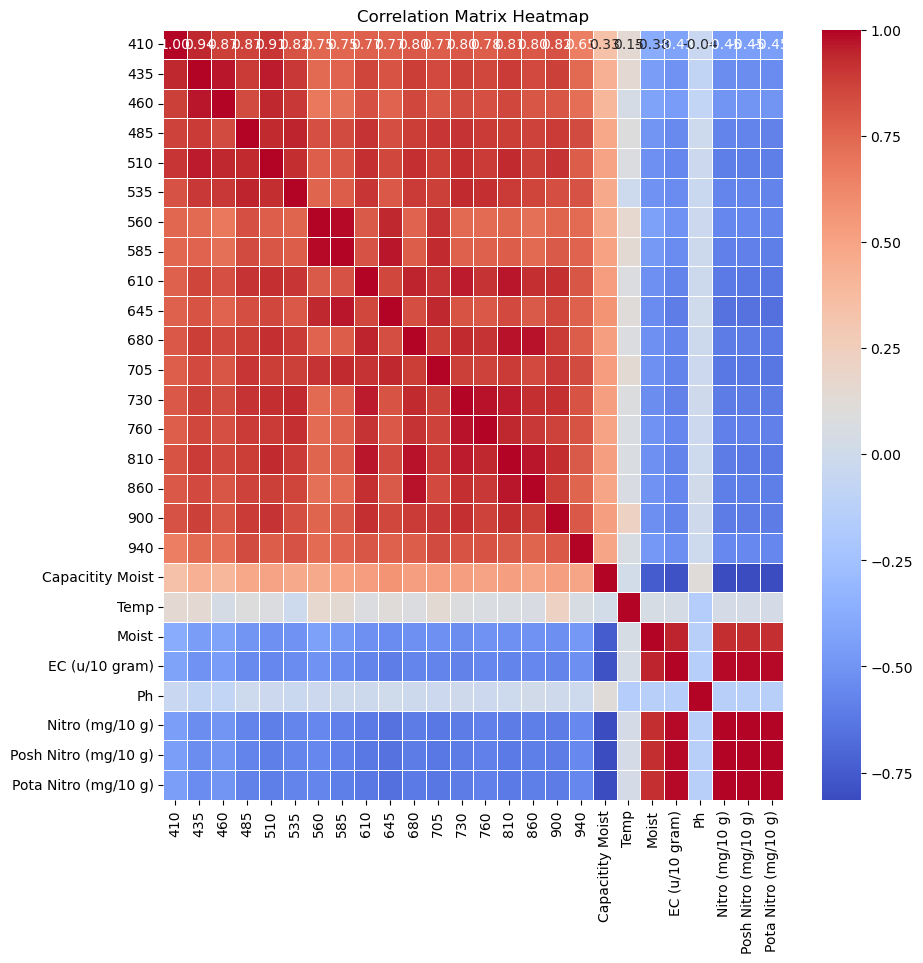

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove 'Records' column if it exists
df = df.drop(columns=['Records'], errors='ignore')

# Compute correlation matrix
corr = df.corr()

# Create heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show plot
plt.title("Correlation Matrix Heatmap")
plt.show()

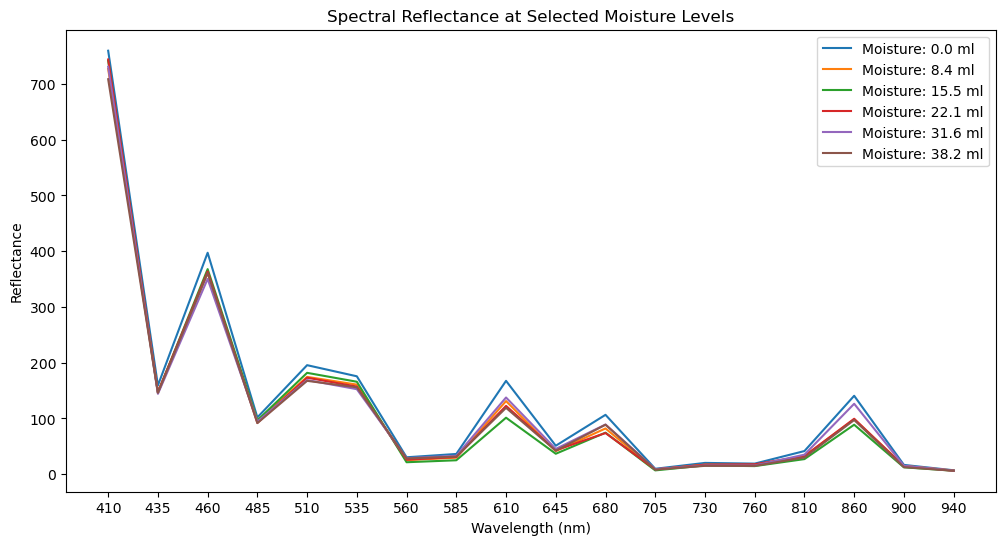

In [27]:
# Define moisture levels of interest
selected_moisture_levels = [0.0, 8.4, 15.5, 22.1, 31.6, 38.2]

# Convert 'Moist' column to numeric (in case it's stored as a string)
df["Moist"] = pd.to_numeric(df["Moist"], errors="coerce")

# Filter dataset for only the selected moisture levels
filtered_df = df[df["Moist"].isin(selected_moisture_levels)]

# Group by moisture level and calculate mean reflectance for each wavelength
moisture_levels = filtered_df.groupby("Moist").mean()

# Plot reflectance curves for selected moisture levels
plt.figure(figsize=(12,6))
for moisture, values in moisture_levels.iterrows():
    plt.plot(df.columns[0:18], values.iloc[0:18], label=f'Moisture: {moisture} ml')

plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance")
plt.title("Spectral Reflectance at Selected Moisture Levels")
plt.legend()
plt.show()

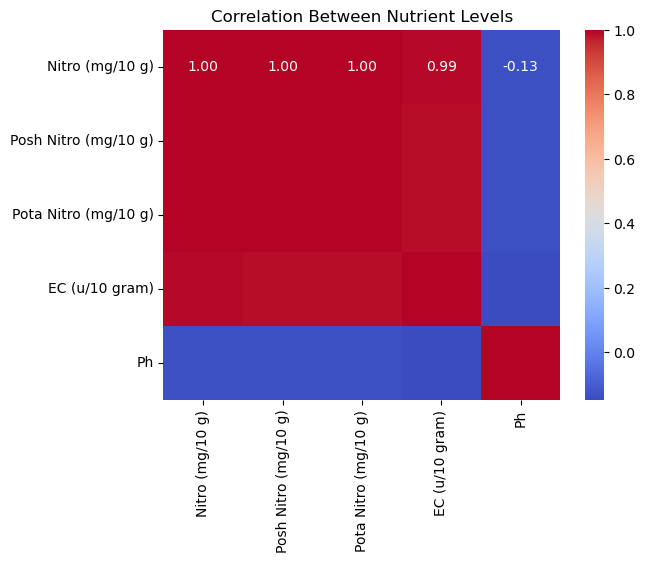

In [45]:
nutrient_corr = df[["Nitro (mg/10 g)", "Posh Nitro (mg/10 g)", "Pota Nitro (mg/10 g)", "EC (u/10 gram)", "Ph"]].corr()
sns.heatmap(nutrient_corr, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Between Nutrient Levels")
plt.show()

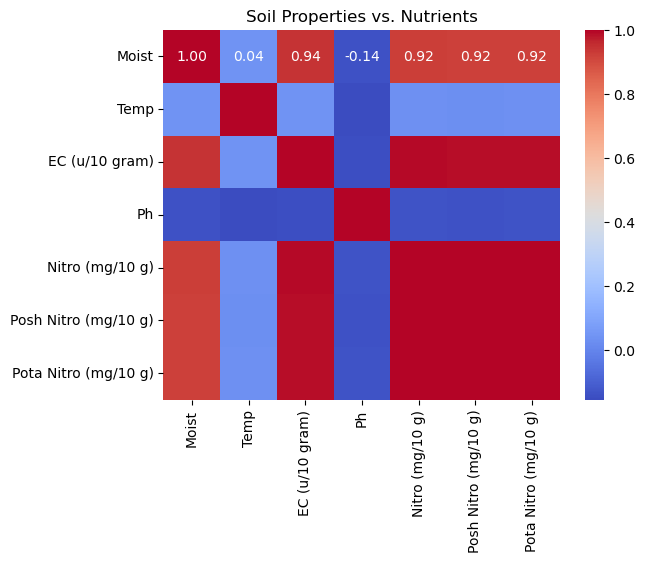

In [47]:
soil_vs_nutrients = df[["Moist", "Temp", "EC (u/10 gram)", "Ph", "Nitro (mg/10 g)", "Posh Nitro (mg/10 g)", "Pota Nitro (mg/10 g)"]].corr()
sns.heatmap(soil_vs_nutrients, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Soil Properties vs. Nutrients")
plt.show()

In [51]:
print(df.columns)

Index(['410', '435', '460', '485', '510', '535', '560', '585', '610', '645',
       '680', '705', '730', '760', '810', '860', '900', '940',
       'Capacitity Moist', 'Temp', 'Moist', 'EC (u/10 gram)', 'Ph',
       'Nitro (mg/10 g)', 'Posh Nitro (mg/10 g)', 'Pota Nitro (mg/10 g)'],
      dtype='object')


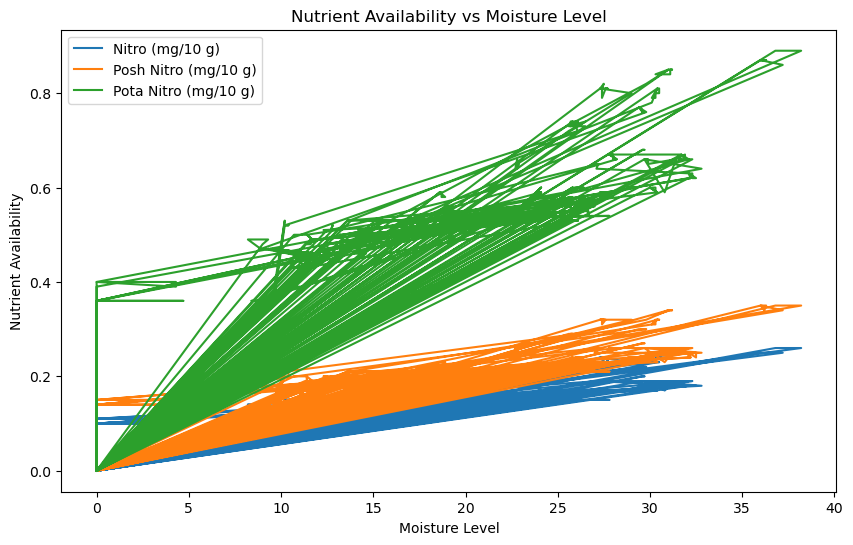

In [71]:
plt.figure(figsize=(10, 6))

for nutrient in ["Nitro (mg/10 g)", "Posh Nitro (mg/10 g)", "Pota Nitro (mg/10 g)"]:
    plt.plot(df["Moist"], df[nutrient], label=nutrient)

plt.xlabel("Moisture Level")
plt.ylabel("Nutrient Availability")
plt.title("Nutrient Availability vs Moisture Level")
plt.legend()
plt.show()

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

In [106]:
# Define features (X) and target variables (y)
X = df[['Moist', 'Capacitity Moist', 'Temp', 'Ph', 'EC (u/10 gram)',
        '410', '435', '460', '485', '510', '535', '560', '585', '610',
        '645', '680', '705', '730', '760', '810', '860', '900', '940']]

y = df[['Nitro (mg/10 g)', 'Posh Nitro (mg/10 g)', 'Pota Nitro (mg/10 g)']]

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [114]:
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_scaled)

In [116]:
xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5)
xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [118]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n📊 {model_name} Model Evaluation:")
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R² Score:", r2_score(y_test, y_pred))

evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")


📊 Random Forest Model Evaluation:
Mean Absolute Error (MAE): 0.00024281970649932738
Mean Squared Error (MSE): 1.026485849056751e-06
Root Mean Squared Error (RMSE): 0.0010131563793693208
R² Score: 0.9999415641365289

📊 XGBoost Model Evaluation:
Mean Absolute Error (MAE): 0.000262583779690861
Mean Squared Error (MSE): 2.1255979528905177e-06
Root Mean Squared Error (RMSE): 0.0014579430554347854
R² Score: 0.9999066882639154


In [136]:
rf_train_preds = rf_model.predict(X_train_scaled)
xgb_train_preds = xgb_model.predict(X_train_scaled)

# Predict on Test Data
rf_test_preds = rf_model.predict(X_test_scaled)
xgb_test_preds = xgb_model.predict(X_test_scaled)

# Function to Evaluate Model
def evaluate_model(y_true, y_pred, dataset, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"📊 **{model_name} Model Evaluation on {dataset}:**")
    print(f"✅ Mean Absolute Error (MAE): {mae:.4f}")
    print(f"✅ Mean Squared Error (MSE): {mse:.4f}")
    print(f"✅ R² Score: {r2:.4f}")
    print("-" * 50)

# Evaluate on Train Data
evaluate_model(y_train, rf_train_preds, "Train Data", "Random Forest")
evaluate_model(y_train, xgb_train_preds, "Train Data", "XGBoost")

# Evaluate on Test Data
evaluate_model(y_test, rf_test_preds, "Test Data", "Random Forest")
evaluate_model(y_test, xgb_test_preds, "Test Data", "XGBoost")

📊 **Random Forest Model Evaluation on Train Data:**
✅ Mean Absolute Error (MAE): 0.0001
✅ Mean Squared Error (MSE): 0.0000
✅ R² Score: 1.0000
--------------------------------------------------
📊 **XGBoost Model Evaluation on Train Data:**
✅ Mean Absolute Error (MAE): 0.0001
✅ Mean Squared Error (MSE): 0.0000
✅ R² Score: 1.0000
--------------------------------------------------
📊 **Random Forest Model Evaluation on Test Data:**
✅ Mean Absolute Error (MAE): 0.0002
✅ Mean Squared Error (MSE): 0.0000
✅ R² Score: 0.9999
--------------------------------------------------
📊 **XGBoost Model Evaluation on Test Data:**
✅ Mean Absolute Error (MAE): 0.0003
✅ Mean Squared Error (MSE): 0.0000
✅ R² Score: 0.9999
--------------------------------------------------


In [145]:
train_mae = mean_absolute_error(y_train, rf_train_preds)
train_mse = mean_squared_error(y_train, rf_train_preds)
train_r2 = r2_score(y_train, rf_train_preds)

# Testing accuracy
test_mae = mean_absolute_error(y_test, rf_test_preds)
test_mse = mean_squared_error(y_test, rf_test_preds)
test_r2 = r2_score(y_test, rf_test_preds)

print("🔹 Model Performance on Training Data:")
print(f"✅ MAE: {train_mae:.4f}")
print(f"✅ MSE: {train_mse:.4f}")
print(f"✅ R² Score: {train_r2:.4f}")

print("\n🔹 Model Performance on Testing Data:")
print(f"✅ MAE: {test_mae:.4f}")
print(f"✅ MSE: {test_mse:.4f}")
print(f"✅ R² Score: {test_r2:.4f}")

🔹 Model Performance on Training Data:
✅ MAE: 0.0001
✅ MSE: 0.0000
✅ R² Score: 1.0000

🔹 Model Performance on Testing Data:
✅ MAE: 0.0002
✅ MSE: 0.0000
✅ R² Score: 0.9999


In [151]:
import pandas as pd

# Convert y_train and y_test to NumPy arrays before flattening
train_results = pd.DataFrame({
    'Actual': y_train.values.ravel(),  # Use .values.ravel() instead of .flatten()
    'Predicted': rf_train_preds.ravel()
})

test_results = pd.DataFrame({
    'Actual': y_test.values.ravel(),
    'Predicted': rf_test_preds.ravel()
})

# Display some samples
print("\n🔍 Training Data Predictions:")
print(train_results.tail(10))  # Show first 10 rows

print("\n🔍 Testing Data Predictions:")
print(test_results.tail(10))  # Show first 10 rows


🔍 Training Data Predictions:
      Actual  Predicted
3806    0.65    0.64945
3807    0.21    0.20980
3808    0.29    0.28970
3809    0.72    0.72155
3810    0.11    0.11000
3811    0.15    0.15000
3812    0.40    0.40000
3813    0.15    0.15000
3814    0.21    0.21000
3815    0.53    0.53000

🔍 Testing Data Predictions:
     Actual  Predicted
944    0.53       0.53
945    0.00       0.00
946    0.00       0.00
947    0.00       0.00
948    0.10       0.10
949    0.14       0.14
950    0.36       0.36
951    0.15       0.15
952    0.20       0.20
953    0.51       0.51


In [153]:
import joblib
joblib.dump(rf_model, "soil_random_forest.pkl")

['soil_random_forest.pkl']